# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set_theme() 

%matplotlib inline

import matplotlib.pyplot as plt
plt.ion()

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
pd.set_option('display.max_columns', None)

sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-19,1620.0,Masculino,9.0,10.0,Branca,3685,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,17,NaN,811.0,110001.0,11.0,3.0,NaN,20121999.0,1.0,0.0,0.0,0.0,26.0,15052018.0,39.0,8.0,8.0,1.0,1.0,2.0,2.0,1.0,2.0,3.0,19022019.0,12.0,0,1,1,1,0,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-21,1830.0,Feminino,8.0,9.0,Branca,3055,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,15,NaN,811.0,110015.0,11.0,3.0,NaN,27041989.0,1.0,1.0,0.0,1.0,24.0,27052018.0,38.0,8.0,10.0,2.0,1.0,2.0,2.0,1.0,5.0,4.0,21022019.0,12.0,0,1,1,5,1,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-25,915.0,Feminino,8.0,10.0,Branca,3460,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,11,NaN,841.0,410045.0,41.0,3.0,NaN,6031981.0,1.0,2.0,1.0,1.0,32.0,18052018.0,40.0,8.0,8.0,1.0,2.0,2.0,2.0,1.0,2.0,4.0,25022019.0,12.0,0,1,1,7,1,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,110037,37 a 41 semanas,Única,Cesáreo,3,2019-03-20,835.0,Feminino,9.0,10.0,Parda,2982,2.0,2019-04-03,NaN,20190005,3.2.01,2019-04-09,20,NaN,841.0,410480.0,41.0,5.0,NaN,15071988.0,4.0,0.0,0.0,0.0,24.0,25062018.0,38.0,8.0,6.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,20032019.0,8.0,0,1,1,2,0,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-03-23,750.0,Feminino,8.0,10.0,Parda,3310,2.0,2019-04-03,NaN,20190005,3.2.01,2019-04-09,17,NaN,811.0,110001.0,11.0,3.0,NaN,12111988.0,4.0,1.0,0.0,1.0,27.0,27062018.0,38.0,8.0,8.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,23032019.0,12.0,0,1,1,5,1,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [8]:
lat_mun = sinasc_raw[['munResLat', 'CONSULTAS', 'APGAR1']]
lat_mun_cut = pd.cut(sinasc_raw['munResLat'],[-14,-10.5,-9])

In [10]:
lat_mun.pivot_table(values=['CONSULTAS', 'APGAR1'],
                    index=lat_mun_cut,
                    aggfunc={
                        'CONSULTAS':[('Soma','sum'),
                                     ('Média','mean'),
                                     ('Mínimo','min'),
                                     ('Máximo','max'),
                                     ('Mediana','median'),
                                     ('Desvio Padrão','std'),
                                     ('Variância','var')],
                        'APGAR1':[('Soma','sum'),
                                  ('Média','mean'),
                                  ('Mínimo','min'),
                                  ('Máximo','max'),
                                  ('Mediana','median'),
                                  ('Desvio Padrão','std'),
                                  ('Variância','var')]},            
                    dropna=True,
                    observed=False
)

APGAR1                                            \
               Desvio Padrão Mediana Máximo     Média Mínimo      Soma   
munResLat                                                                
(-14.0, -10.5]      0.960767     8.0   10.0  8.070216    0.0  104590.0   
(-10.5, -9.0]       1.094086     8.0   10.0  8.081652    0.0   42461.0   

                             CONSULTAS                                         \
               Variância Desvio Padrão Mediana Máximo     Média Mínimo   Soma   
munResLat                                                                       
(-14.0, -10.5]  0.923073      0.643372     4.0      9  3.694297      1  48000   
(-10.5, -9.0]   1.197025      0.647259     4.0      9  3.683840      1  19377   

                          
               Variância  
munResLat                 
(-14.0, -10.5]  0.413928  
(-10.5, -9.0]   0.418944

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [13]:
sinasc_raw['munResArea'].describe()

count    27027.000000
mean     14702.799767
std      13706.177751
min        459.978000
25%       3792.998000
50%       6896.648000
75%      34096.394000
max      34096.394000
Name: munResArea, dtype: float64

In [15]:
area_mun = sinasc_raw[['munResArea','SEMAGESTAC', 'CONSPRENAT']]
area_mun_cut = pd.cut(area_mun['munResArea'],[0, 3000, 34100])

In [17]:
area_mun.pivot_table(values=['SEMAGESTAC', 'CONSPRENAT'],
                     index=area_mun_cut,
                     aggfunc={
                        'SEMAGESTAC':[('Soma','sum'),
                                     ('Média','mean'),
                                     ('Mínimo','min'),
                                     ('Máximo','max'),
                                     ('Mediana','median'),
                                     ('Desvio Padrão','std'),
                                     ('Variância','var')],
                        'CONSPRENAT':[('Soma','sum'),
                                      ('Média','mean'),
                                      ('Mínimo','min'),
                                      ('Máximo','max'),
                                      ('Mediana','median'),
                                      ('Desvio Padrão','std'),
                                      ('Variância','var')]},
                     dropna=True,
                     observed=False
)

CONSPRENAT                                            \
              Desvio Padrão Mediana Máximo     Média Mínimo      Soma   
munResArea                                                              
(0, 3000]          4.290017     8.0   99.0  8.709395    0.0   44775.0   
(3000, 34100]      5.325530     8.0   99.0  8.143825    0.0  170662.0   

                            SEMAGESTAC                                   \
               Variância Desvio Padrão Mediana Máximo      Média Mínimo   
munResArea                                                                
(0, 3000]      18.404248      1.874927    39.0   45.0  38.470485   21.0   
(3000, 34100]  28.361275      2.049838    39.0   45.0  38.591547   19.0   

                                   
                   Soma Variância  
munResArea                         
(0, 3000]      197469.0  3.515350  
(3000, 34100]  797147.0  4.201834

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [20]:
sinasc_raw['munResAlt'].describe()

count    27027.000000
mean       179.111999
std        123.138365
min         85.000000
25%         87.000000
50%        153.000000
75%        191.000000
max        595.000000
Name: munResAlt, dtype: float64

In [22]:
alt_mun = sinasc_raw[['munResAlt', 'MESPRENAT','STCESPARTO']]
alt_mun_cut = pd.cut(alt_mun['munResAlt'],[0,85,600])

In [24]:
alt_mun.pivot_table(values=['MESPRENAT','STCESPARTO'],
                    index=alt_mun_cut,
                    aggfunc={
                        'MESPRENAT':[('Soma','sum'),
                                     ('Média','mean'),
                                     ('Mínimo','min'),
                                     ('Máximo','max'),
                                     ('Mediana','median'),
                                     ('Desvio Padrão','std'),
                                     ('Variância','var')],
                        'STCESPARTO':[('Soma','sum'),
                                      ('Média','mean'),
                                      ('Mínimo','min'),
                                      ('Máximo','max'),
                                      ('Mediana','median'),
                                      ('Desvio Padrão','std'),
                                      ('Variância','var')]},
                     dropna=True,
                     observed=False
)

MESPRENAT                                             \
          Desvio Padrão Mediana Máximo      Média Mínimo      Soma   
munResAlt                                                            
(0, 85]       30.442891     3.0   99.0  13.939516    1.0    3457.0   
(85, 600]     22.570961     2.0   99.0   8.069167    1.0  192958.0   

                         STCESPARTO                                           \
            Variância Desvio Padrão Mediana Máximo     Média Mínimo     Soma   
munResAlt                                                                      
(0, 85]    926.769606      1.180117     3.0    9.0  2.414557    1.0    763.0   
(85, 600]  509.448294      1.358987     2.0    9.0  2.294793    1.0  59582.0   

                     
          Variância  
munResAlt            
(0, 85]    1.392676  
(85, 600]  1.846846

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [27]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

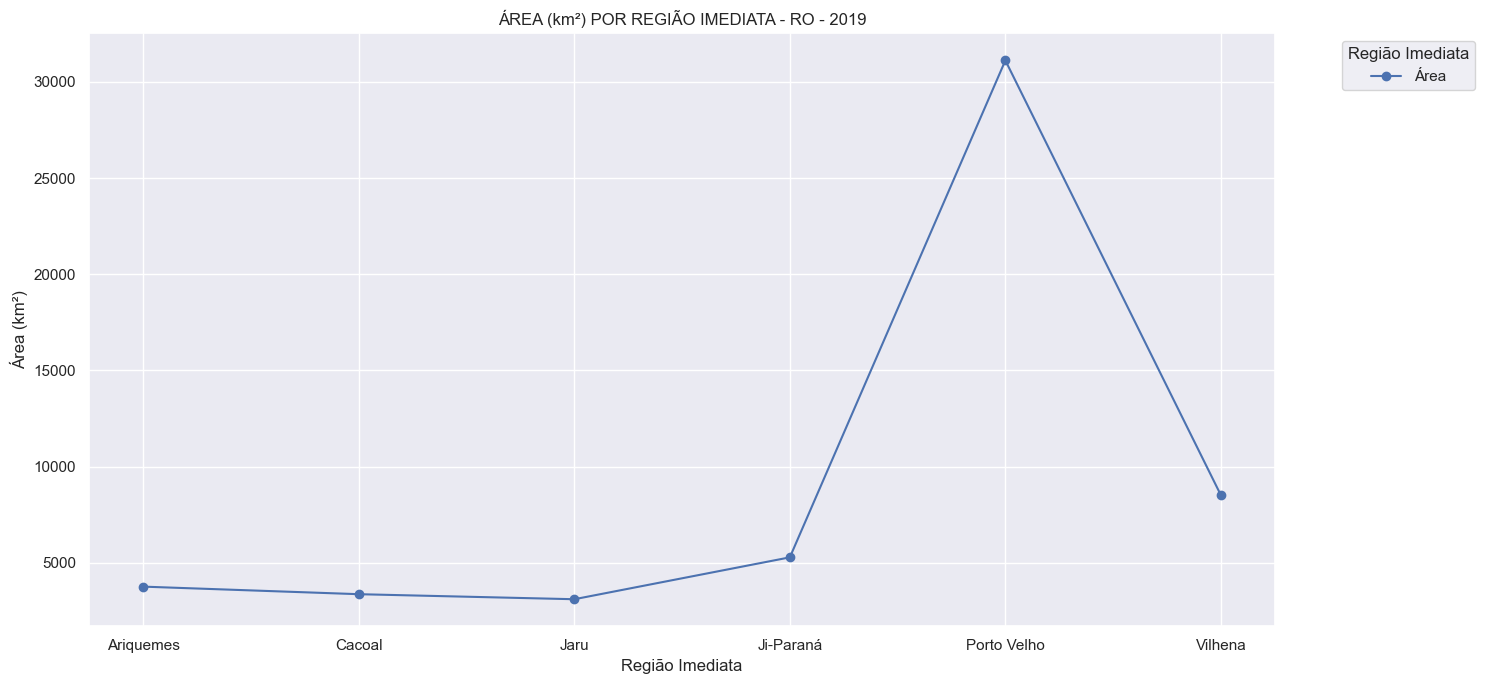

In [227]:
# I created a new column
sinasc_raw['REGIAO_IMEDIATA'] = sinasc_raw['munResNome'].map(imediatas)
idade_media = sinasc_raw.groupby('REGIAO_IMEDIATA')['munResArea'].mean()

plt.figure(figsize=(15, 7))
idade_media.plot(marker='o', label='Área')
plt.title('ÁREA (km²) POR REGIÃO IMEDIATA - RO - 2019')
plt.xlabel('Região Imediata')
plt.ylabel('Área (km²)')
plt.grid(True)
plt.legend(title='Região Imediata', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [33]:
idmh = {
    'Porto Velho': 0.736,
    'Vilhena': 0.731,
    'Cacoal': 0.718,
    'Ji-Paraná': 0.714,
    'Pimenta Bueno': 0.710,
    'Ariquemes': 0.702,
    'Rolim de Moura': 0.700,
    'Cerejeiras': 0.692,
    'Jaru': 0.689,
    'Colorado do Oeste': 0.685,
    'Ouro Preto do Oeste': 0.682,
    "Espigão d'Oeste": 0.672,
    "Santa Luzia d'Oeste": 0.670,
    "Pimenteiras do Oeste": 0.665,
    'Presidente Médici': 0.664,
    'Castanheiras': 0.658,
    'Guajará-Mirim': 0.657,
    'Chupinguaia': 0.652,
    'Cabixi': 0.650,
    'Candeias do Jamari': 0.649,
    "São Felipe d'Oeste": 0.649,
    'Cacaulândia': 0.646,
    "São Miguel do Guaporé": 0.646,
    'Mirante da Serra': 0.643,
    "Alvorada d'Oeste": 0.643,
    'Teixeirópolis': 0.643,
    "Nova Brasilândia d'Oeste": 0.643,
    'Rio Crespo': 0.643,
    'Primavera de Rondônia': 0.641,
    "Alta Floresta d'Oeste": 0.641,
    'Ministro Andreazza': 0.638,
    'Novo Horizonte do Oeste': 0.634,
    'Vale do Paraíso': 0.627,
    'Alto Paraíso': 0.625,
    'Parecis': 0.617,
    'Buritis': 0.616,
    "Itapuã do Oeste": 0.614,
    'Corumbiara': 0.613,
    'Cujubim': 0.612,
    'Costa Marques': 0.611,
    "São Francisco do Guaporé": 0.611,
    'Urupá': 0.609,
    'Monte Negro': 0.607,
    'Seringueiras': 0.598,
    'Governador Jorge Teixeira': 0.596,
    "Machadinho d'Oeste": 0.596,
    'Campo Novo de Rondônia': 0.593,
    'Alto Alegre dos Parecis': 0.592,
    'Theobroma': 0.589,
    'Nova União': 0.587,
    'Nova Mamoré': 0.587,
    'Vale do Anari': 0.584
}

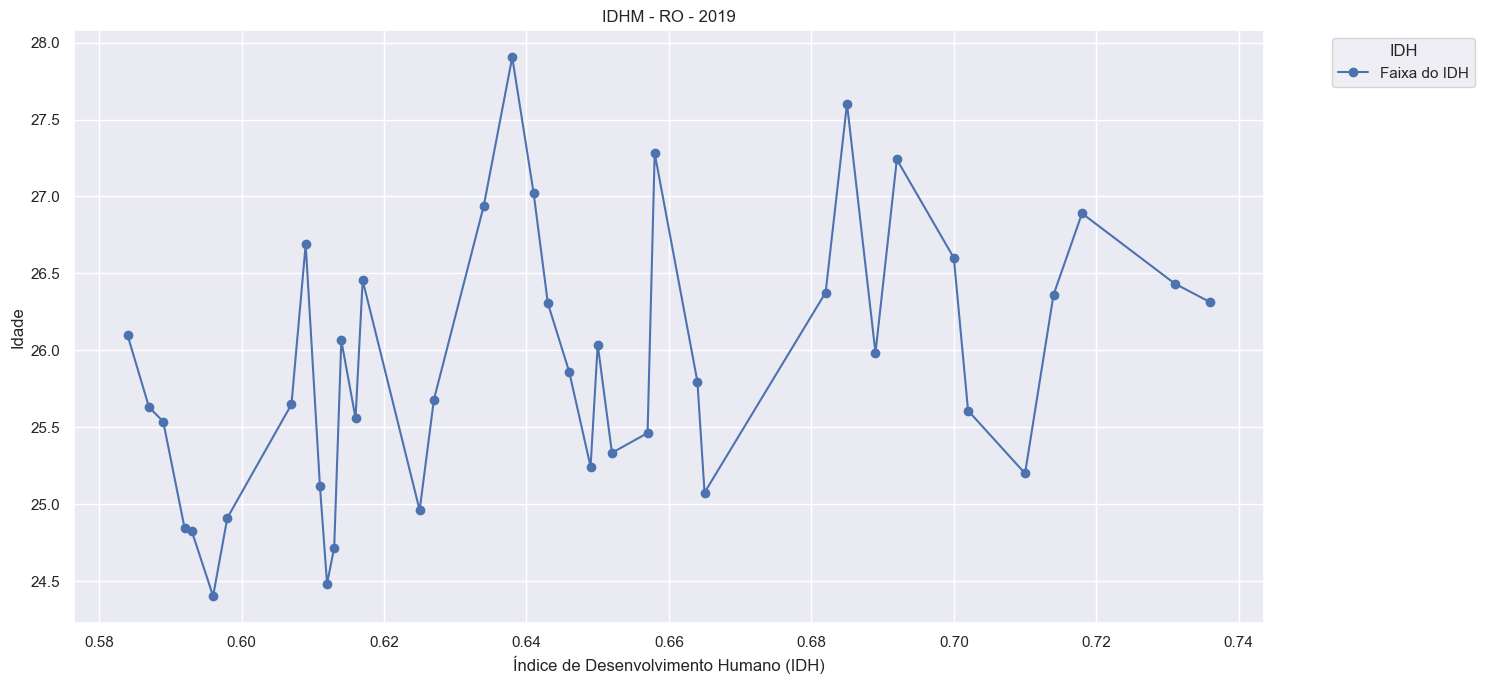

In [225]:
sinasc_raw['IDHM'] = sinasc_raw['munResNome'].map(idmh)
idhm_dados = sinasc_raw.groupby('IDHM')['IDADEMAE'].mean()

plt.figure(figsize=(15, 7))
idhm_dados.plot(marker='o', label='Faixa do IDH')
plt.title('IDHM - RO - 2019')
plt.xlabel('Índice de Desenvolvimento Humano (IDH)')
plt.ylabel('Idade')
plt.grid(True)
plt.legend(title='IDH', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [206]:
idades_medias_arredondadas = idhm_dados.round()
frequencia_idades = idades_medias_arredondadas.value_counts().sort_index()
print(frequencia_idades)

IDADEMAE
24.0     2
25.0    11
26.0    18
27.0     7
28.0     2
Name: count, dtype: int64


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [39]:
ifdm = {
    'Ariquemes': 0.7746,
    'Vilhena': 0.7465,
    'Pimenta Bueno': 0.7383,
    'Porto Velho': 0.7257,
    'Ji-Paraná': 0.7117,
    'Cacoal': 0.7111,
    "Santa Luzia d'Oeste": 0.6850,
    'Rolim de Moura': 0.6785,
    'Chupinguaia': 0.6766,
    'São Miguel do Guaporé': 0.6699,
    'Pimenteiras do Oeste': 0.6501,
    'Teixeirópolis': 0.6500,
    'Colorado do Oeste': 0.6473,
    'Jaru': 0.6450,
    'Rio Crespo': 0.6430,
    'Primavera de Rondônia': 0.6384,
    "Alta Floresta d'Oeste": 0.6337,
    'Ouro Preto do Oeste': 0.6261,
    'São Francisco do Guaporé': 0.6214,
    'Candeias do Jamari': 0.6199,
    'Buritis': 0.6199,
    "São Felipe d'Oeste": 0.6153,
    'Presidente Médici': 0.6140,
    'Cerejeiras': 0.6137,
    'Monte Negro': 0.6016,
    'Urupá': 0.6006,
    "Espigão d'Oeste": 0.5973,
    'Seringueiras': 0.5922,
    "Alvorada d'Oeste": 0.5919,
    "Itapuã do Oeste": 0.5903,
    'Cabixi': 0.5887,
    'Novo Horizonte do Oeste': 0.5858,
    "Nova Brasilândia d'Oeste": 0.5857,
    'Vale do Paraíso': 0.5818,
    'Corumbiara': 0.5759,
    'Alto Paraíso': 0.5735,
    'Cacaulândia': 0.5721,
    'Vale do Anari': 0.5710,
    'Ministro Andreazza': 0.5657,
    'Costa Marques': 0.5626,
    'Nova União': 0.5571,
    'Guajará-Mirim': 0.5541,
    'Mirante da Serra': 0.5519,
    'Parecis': 0.5502,
    'Castanheiras': 0.5430,
    'Theobroma': 0.5405,
    "Machadinho d'Oeste": 0.5322,
    'Campo Novo de Rondônia': 0.5272,
    'Nova Mamoré': 0.5084,
    'Cujubim': 0.5055,
    'Alto Alegre dos Parecis': 0.5046,
    'Governador Jorge Teixeira': 0.4562
}


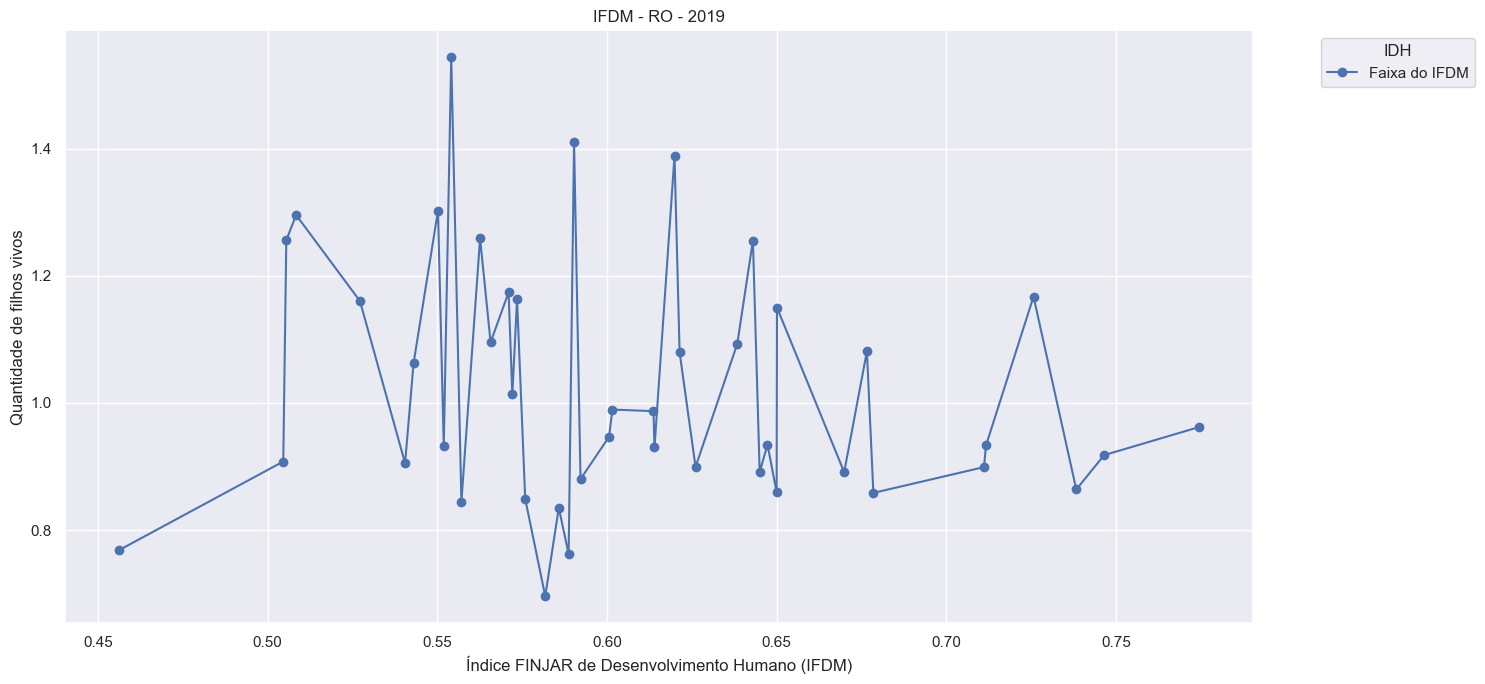

In [231]:
sinasc_raw['IFDM'] = sinasc_raw['munResNome'].map(ifdm)
ifdm_dados = sinasc_raw.groupby('IFDM')['QTDFILVIVO'].mean()

plt.figure(figsize=(15, 7))
ifdm_dados.plot(marker='o', label='Faixa do IFDM')
plt.title('IFDM - RO - 2019')
plt.xlabel('Índice FINJAR de Desenvolvimento Humano (IFDM)')
plt.ylabel('Quantidade de filhos vivos')
plt.grid(True)
plt.legend(title='IDH', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [236]:
def classificar_ifdm(valor):
    if pd.isna(valor):
        return 'Sem dados'
    elif valor > 0.8:
        return 'Alto'
    elif 0.6 < valor <= 0.8:
        return 'Moderado'
    elif 0.4 < valor <= 0.6:
        return 'Regular'
    else:
        return 'Baixo'

sinasc_raw['IFDM_categoria'] = sinasc_raw['IFDM'].apply(classificar_ifdm)
resultado = sinasc_raw.groupby('IFDM_categoria')['QTDFILVIVO'].sum()
print(resultado)


IFDM_categoria
Moderado    20607.0
Regular      4155.0
Name: QTDFILVIVO, dtype: float64


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [138]:
pib_dict = {
    'Porto Velho': 17912070,
    'Ji-Paraná': 3783972,
    'Vilhena': 2831175,
    'Ariquemes': 2579830,
    'Cacoal': 2261644,
    'Jaru': 1500890,
    'Rolim de Moura': 1283434,
    'Pimenta Bueno': 1164877,
    'Guajará-Mirim': 893000,
    'Ouro Preto do Oeste': 834000,
    'Buritis': 726000,
    'Machadinho do Oeste': 633000,
    'Espigão d\'Oeste': 625000,
    'São Miguel do Guaporé': 616000,
    'Candeias do Jamari': 548000,
    'Nova Mamoré': 529000,
    'Cerejeiras': 507000,
    'Alta Floresta do Oeste': 496000,
    'Presidente Médici': 428000,
    'Cujubim': 385000,
    'Nova Brasilândia do Oeste': 360000,
    'Alto Paraíso': 358000,
    'São Francisco do Guaporé': 353000,
    'Colorado do Oeste': 335000,
    'Monte Negro': 219152,
    'Alto Alegre dos Parecis': 213410,
    'Campo Novo de Rondônia': 208821,
    'Alvorada do Oeste': 204098,
    'Chupinguaia': 190331,
    'Corumbiara': 188218,
    'Ministro Andreazza': 174633,
    'Urupá': 172143,
    'Costa Marques': 171878,
    'Seringueiras': 169429,
    'Mirante da Serra': 163955,
    'Governador Jorge Teixeira': 148027,
    'Theobroma': 140601,
    'Santa Luzia do Oeste': 135934,
    'Novo Horizonte do Oeste': 129399,
    'Itapuã do Oeste': 129351,
    'Vale do Paraíso': 116742,
    'Cacaulândia': 116635,
    'Cabixi': 113031,
    'Vale do Anari': 105208,
    'Nova União': 92346,
    'Parecis': 80759,
    'Rio Crespo': 76854,
    'Pimenteiras do Oeste': 76756,
    'Teixeirópolis': 72089,
    'São Felipe do Oeste': 72084,
    'Castanheiras': 59779,
    'Primavera de Rondônia': 52908
}
pib_dict = {key: value / 1000 for key, value in pib_dict.items()}

In [144]:
sinasc_raw['PIB'] = sinasc_raw['munResNome'].map(pib_dict)
ifdm_dados = sinasc_raw.groupby('PIB')['munResArea'].mean()

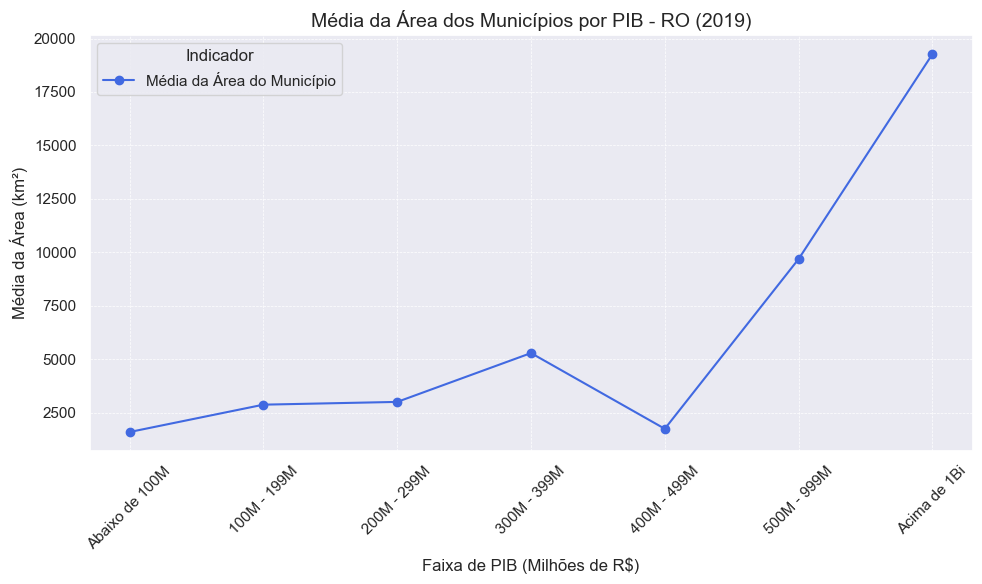

In [252]:
bins = [0, 100, 200, 300, 400, 500, 1000, np.inf]  # Agora as faixas estão em milhões
labels = ['Abaixo de 100M', '100M - 199M', '200M - 299M', '300M - 399M', '400M - 499M', '500M - 999M', 'Acima de 1Bi']

sinasc_raw['PIB_range'] = pd.cut(sinasc_raw['PIB'], 
                                 bins=bins, 
                                 labels=labels)


pib_dados = sinasc_raw.groupby('PIB_range', 
                               observed=False)['munResArea'].mean()

plt.figure(figsize=(10, 6))
pib_dados = pib_dados.sort_index()

plt.plot(pib_dados.index, 
         pib_dados.values, 
         marker='o', 
         linestyle='-', 
         color='royalblue', 
         label='Média da Área do Município')

plt.xticks(rotation=45)
plt.grid(True, 
         which='both', 
         linestyle='--', 
         linewidth=0.5)
plt.title('Média da Área dos Municípios por PIB - RO (2019)', 
          fontsize=14)
plt.xlabel('Faixa de PIB (Milhões de R$)', 
           fontsize=12)
plt.ylabel('Média da Área (km²)', 
           fontsize=12)

plt.legend(title='Indicador')
plt.tight_layout()
plt.show()

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

# GRÁFICOS
## ÁREA (km²) POR REGIÃO IMEDIATA - RO - 2019

![Logo da empresa](regiao_imediata.png)

1) Pude constatar que a regão de Porto Velho, apesar de ter 5 municípios, é a que possui maior área. Podemos deduzir que a capital, também chamada de Porto Velho, influencia diretamente nessa estatística.  
2) Ji-Paraná, por sua vez, apesar de possuir 9 municípios na sua região, está com a menor área do gráfico.

## IDHM - RO - 2019

1) Usando a linha de código abaixo, constatei que a idade média de 26 foi a que mais apareceu. A máxima (28) e a mínima (24) foram as que menos apareceram.
   
   idades_medias_arredondadas = idhm_dados.round()
   frequencia_idades = idades_medias_arredondadas.value_counts().sort_index()

## IFDM - RO - 2019

Usei a variável 'Quantidade filhos vivos' para entender a relação desta com o IFDM, sendo que esta leva em conta três indicadores: emprego e renda como um único indicador e educação e saúde como indicadores separados.

![Logo da empresa](ifdm.png)

Código para mensurar a quantidade de filhos vivos por categoria:
![Logo da empresa](codigo.png)

O resultado foi:
Moderado    20607
Regular      4155

Ou seja, quanto maior a qualidade dos indicadores do IFDM, maior a probabilidade de ter filhos vivos.

## Média da Área dos Municípios por PIB - RO (2019)

A relação de área (km²) e PIB é diretamente proporcional, ou seja, na maioria dos casos, quanto maior a área, maior o PIB.